In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
df = pd.read_csv('Datasets/dataset_olympics.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [10]:
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data_Type': df.dtypes.values,
    'Unique_Values': [df[col].nunique() for col in df.columns]
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
missing_df

,Column,Missing_Count,Missing_Percentage,Data_Type,Unique_Values
14,Medal,60310,86.16,object,3
5,Weight,17101,24.43,float64,173
4,Height,16254,23.22,float64,87
3,Age,2732,3.90,float64,68


In [11]:
print(missing_df.to_string(index=False))

Column  Missing_Count  Missing_Percentage Data_Type  Unique_Values
 Medal          60310               86.16    object              3
Weight          17101               24.43   float64            173
Height          16254               23.22   float64             87
   Age           2732                3.90   float64             68


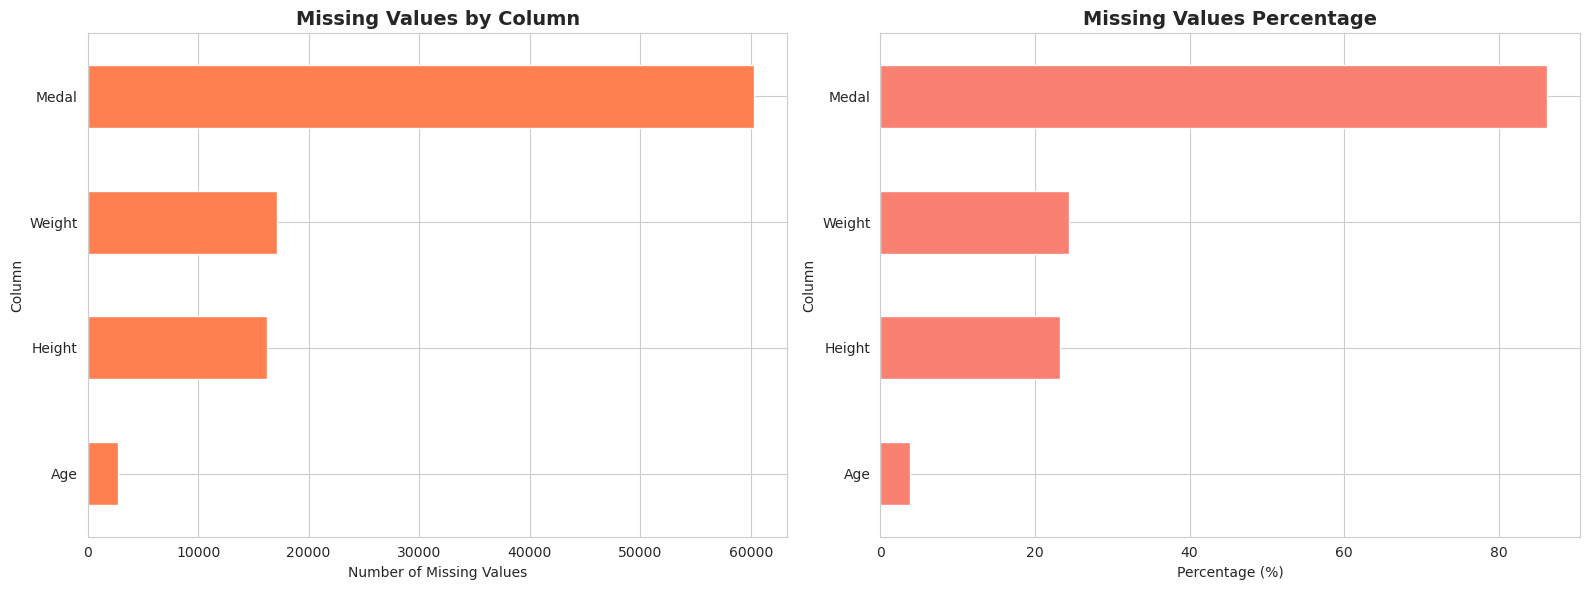

In [15]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Missing value counts
ax1 = axes[0]
missing_cols = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=True)
missing_cols.plot(kind='barh', ax=ax1, color='coral')
ax1.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Missing Values')
ax1.set_ylabel('Column')

# Missing value percentages
ax2 = axes[1]
missing_pct = (df.isnull().sum()[df.isnull().sum() > 0] / len(df) * 100).sort_values(ascending=True)
missing_pct.plot(kind='barh', ax=ax2, color='salmon')
ax2.set_title('Missing Values Percentage', fontsize=14, fontweight='bold')
ax2.set_xlabel('Percentage (%)')
ax2.set_ylabel('Column')

plt.tight_layout()
plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')

In [16]:
numeric_cols = ['Age', 'Height', 'Weight', 'Year']
outlier_summary = []

print("\nOutlier Detection using IQR Method (1.5 * IQR):\n")

for col in numeric_cols:
    if col in df.columns:
        data = df[col].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        outlier_pct = (len(outliers) / len(data)) * 100
        
        outlier_summary.append({
            'Column': col,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Outlier_Count': len(outliers),
            'Outlier_Percentage': round(outlier_pct, 2),
            'Min_Value': data.min(),
            'Max_Value': data.max()
        })
        
        print(f"{col}:")
        print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  Outliers: {len(outliers):,} ({outlier_pct:.2f}%)")
        print(f"  Actual Range: [{data.min():.2f}, {data.max():.2f}]\n")

outlier_df = pd.DataFrame(outlier_summary)
print("\nOutlier Summary Table:")
print(outlier_df.to_string(index=False))


Outlier Detection using IQR Method (1.5 * IQR):

Age:
  Range: [10.50, 38.50]
  Outliers: 2,939 (4.37%)
  Actual Range: [11.00, 88.00]

Height:
  Range: [145.50, 205.50]
  Outliers: 325 (0.60%)
  Actual Range: [127.00, 223.00]

Weight:
  Range: [34.00, 106.00]
  Outliers: 867 (1.64%)
  Actual Range: [25.00, 214.00]

Year:
  Range: [1897.00, 2065.00]
  Outliers: 65 (0.09%)
  Actual Range: [1896.00, 2016.00]


Outlier Summary Table:
Column  Lower_Bound  Upper_Bound  Outlier_Count  Outlier_Percentage  Min_Value  Max_Value
   Age         10.5         38.5           2939                4.37       11.0       88.0
Height        145.5        205.5            325                0.60      127.0      223.0
Weight         34.0        106.0            867                1.64       25.0      214.0
  Year       1897.0       2065.0             65                0.09     1896.0     2016.0


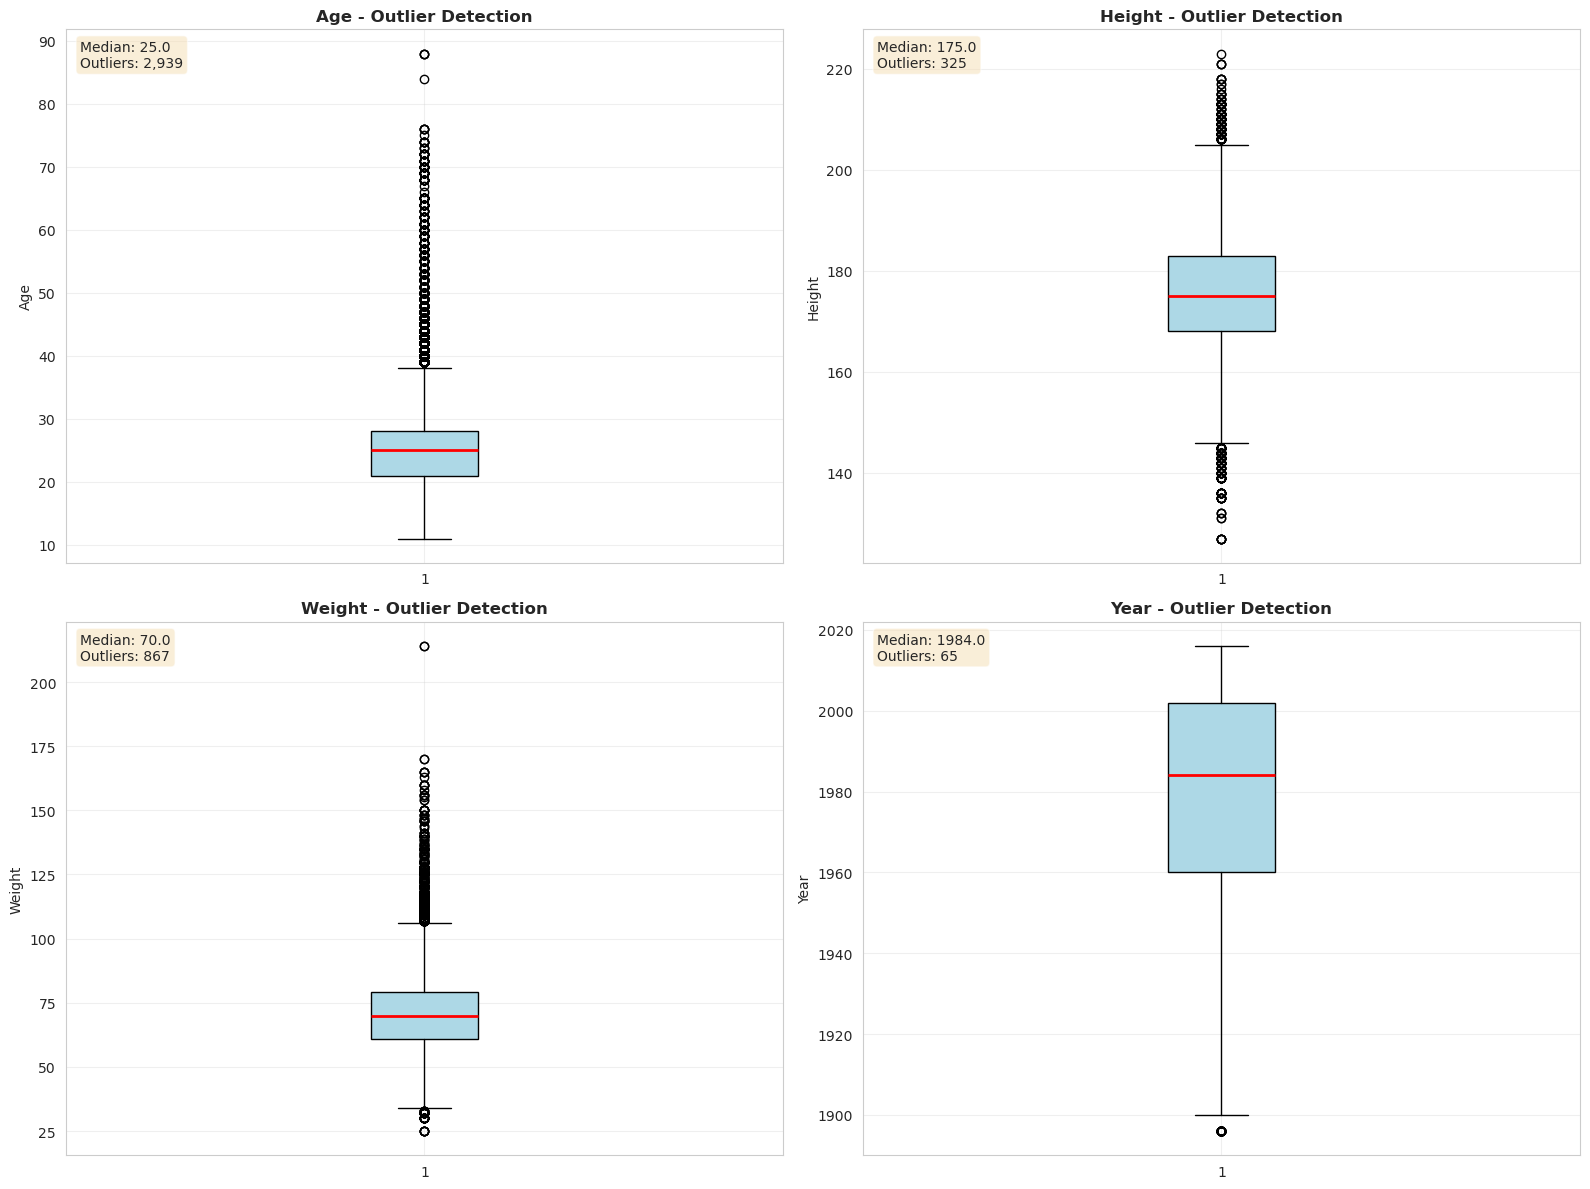

In [17]:
# Visualize outliers with boxplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if col in df.columns:
        ax = axes[idx]
        data = df[col].dropna()
        
        # Boxplot
        bp = ax.boxplot(data, vert=True, patch_artist=True, 
                        boxprops=dict(facecolor='lightblue'),
                        medianprops=dict(color='red', linewidth=2))
        ax.set_title(f'{col} - Outlier Detection', fontsize=12, fontweight='bold')
        ax.set_ylabel(col)
        ax.grid(alpha=0.3)
        
        # Add statistics text
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
        
        stats_text = f'Median: {data.median():.1f}\nOutliers: {len(outliers):,}'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [20]:
# Z-score based outlier detection
print("\n" + "-"*80)
print("Outlier Detection using Z-Score Method (|Z| > 3):\n")

for col in numeric_cols:
    if col in df.columns:
        data = df[col].dropna()
        z_scores = np.abs(stats.zscore(data))
        outliers_z = data[z_scores > 3]
        print(f"{col}: {len(outliers_z):,} outliers ({len(outliers_z)/len(data)*100:.2f}%)")


--------------------------------------------------------------------------------
Outlier Detection using Z-Score Method (|Z| > 3):

Age: 995 outliers (1.48%)
Height: 260 outliers (0.48%)
Weight: 581 outliers (1.10%)
Year: 0 outliers (0.00%)


In [21]:
# Create a copy for processing
df_processed = df.copy()

In [22]:
df_processed['Age'] = df_processed.groupby(['Sport', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

In [23]:
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)

In [24]:
print(f"   Result: {df_processed['Age'].isnull().sum()} missing values remaining")

   Result: 0 missing values remaining


In [25]:
df_processed['Height'] = df_processed.groupby(['Sport', 'Sex'])['Height'].transform(
    lambda x: x.fillna(x.median())
)
df_processed['Height'].fillna(df_processed['Height'].median(), inplace=True)
print(f"   Result: {df_processed['Height'].isnull().sum()} missing values remaining")

   Strategy: Fill with median grouped by Sport and Sex
   Result: 0 missing values remaining


In [26]:
df_processed['Weight'] = df_processed.groupby(['Sport', 'Sex'])['Weight'].transform(
    lambda x: x.fillna(x.median())
)
df_processed['Weight'].fillna(df_processed['Weight'].median(), inplace=True)
print(f"   Result: {df_processed['Weight'].isnull().sum()} missing values remaining")

   Result: 0 missing values remaining


In [27]:
df_processed['Won_Medal'] = df_processed['Medal'].notna().astype(int)

In [29]:
df_processed.isnull().sum()

ID               0
Name             0
Sex              0
Age              0
Height           0
Weight           0
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal        60310
Won_Medal        0
dtype: int64

In [30]:
df_outliers_handled = df_processed.copy()

In [31]:
for col in ['Age', 'Height', 'Weight']:
    print(f"\n{col}:")
    
    # Calculate bounds
    Q1 = df_outliers_handled[col].quantile(0.25)
    Q3 = df_outliers_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before
    outliers_before = ((df_outliers_handled[col] < lower_bound) | 
                       (df_outliers_handled[col] > upper_bound)).sum()
    
    # Cap outliers (Winsorization)
    df_outliers_handled[col] = df_outliers_handled[col].clip(lower=lower_bound, upper=upper_bound)
    
    print(f"   Strategy: Winsorization (capping at bounds)")
    print(f"   Outliers capped: {outliers_before:,}")
    print(f"   New range: [{df_outliers_handled[col].min():.2f}, {df_outliers_handled[col].max():.2f}]")



Age:
   Strategy: Winsorization (capping at bounds)
   Outliers capped: 3,521
   New range: [13.00, 37.00]

Height:
   Strategy: Winsorization (capping at bounds)
   Outliers capped: 1,005
   New range: [152.00, 200.00]

Weight:
   Strategy: Winsorization (capping at bounds)
   Outliers capped: 1,586
   New range: [40.50, 100.50]


In [32]:
df_scaled = df_outliers_handled.copy()

In [33]:
scaler_standard = StandardScaler()
scaled_cols_standard = ['Age', 'Height', 'Weight']
df_scaled[['Age_scaled', 'Height_scaled', 'Weight_scaled']] = scaler_standard.fit_transform(
    df_scaled[scaled_cols_standard]
)

for col in scaled_cols_standard:
    scaled_col = f"{col}_scaled"
    print(f"\n{col}:")
    print(f"   Original - Mean: {df_scaled[col].mean():.2f}, Std: {df_scaled[col].std():.2f}")
    print(f"   Scaled   - Mean: {df_scaled[scaled_col].mean():.2e}, Std: {df_scaled[scaled_col].std():.2f}")


Age:
   Original - Mean: 25.32, Std: 5.30
   Scaled   - Mean: -1.94e-16, Std: 1.00

Height:
   Original - Mean: 175.91, Std: 9.45
   Scaled   - Mean: -1.17e-15, Std: 1.00

Weight:
   Original - Mean: 71.30, Std: 12.35
   Scaled   - Mean: 1.77e-16, Std: 1.00


In [34]:
scaler_minmax = MinMaxScaler()
df_scaled[['Age_normalized', 'Height_normalized', 'Weight_normalized']] = scaler_minmax.fit_transform(
    df_scaled[scaled_cols_standard]
)

for col in scaled_cols_standard:
    norm_col = f"{col}_normalized"
    print(f"\n{col}:")
    print(f"   Original range: [{df_scaled[col].min():.2f}, {df_scaled[col].max():.2f}]")
    print(f"   Normalized range: [{df_scaled[norm_col].min():.2f}, {df_scaled[norm_col].max():.2f}]")


Age:
   Original range: [13.00, 37.00]
   Normalized range: [0.00, 1.00]

Height:
   Original range: [152.00, 200.00]
   Normalized range: [0.00, 1.00]

Weight:
   Original range: [40.50, 100.50]
   Normalized range: [0.00, 1.00]


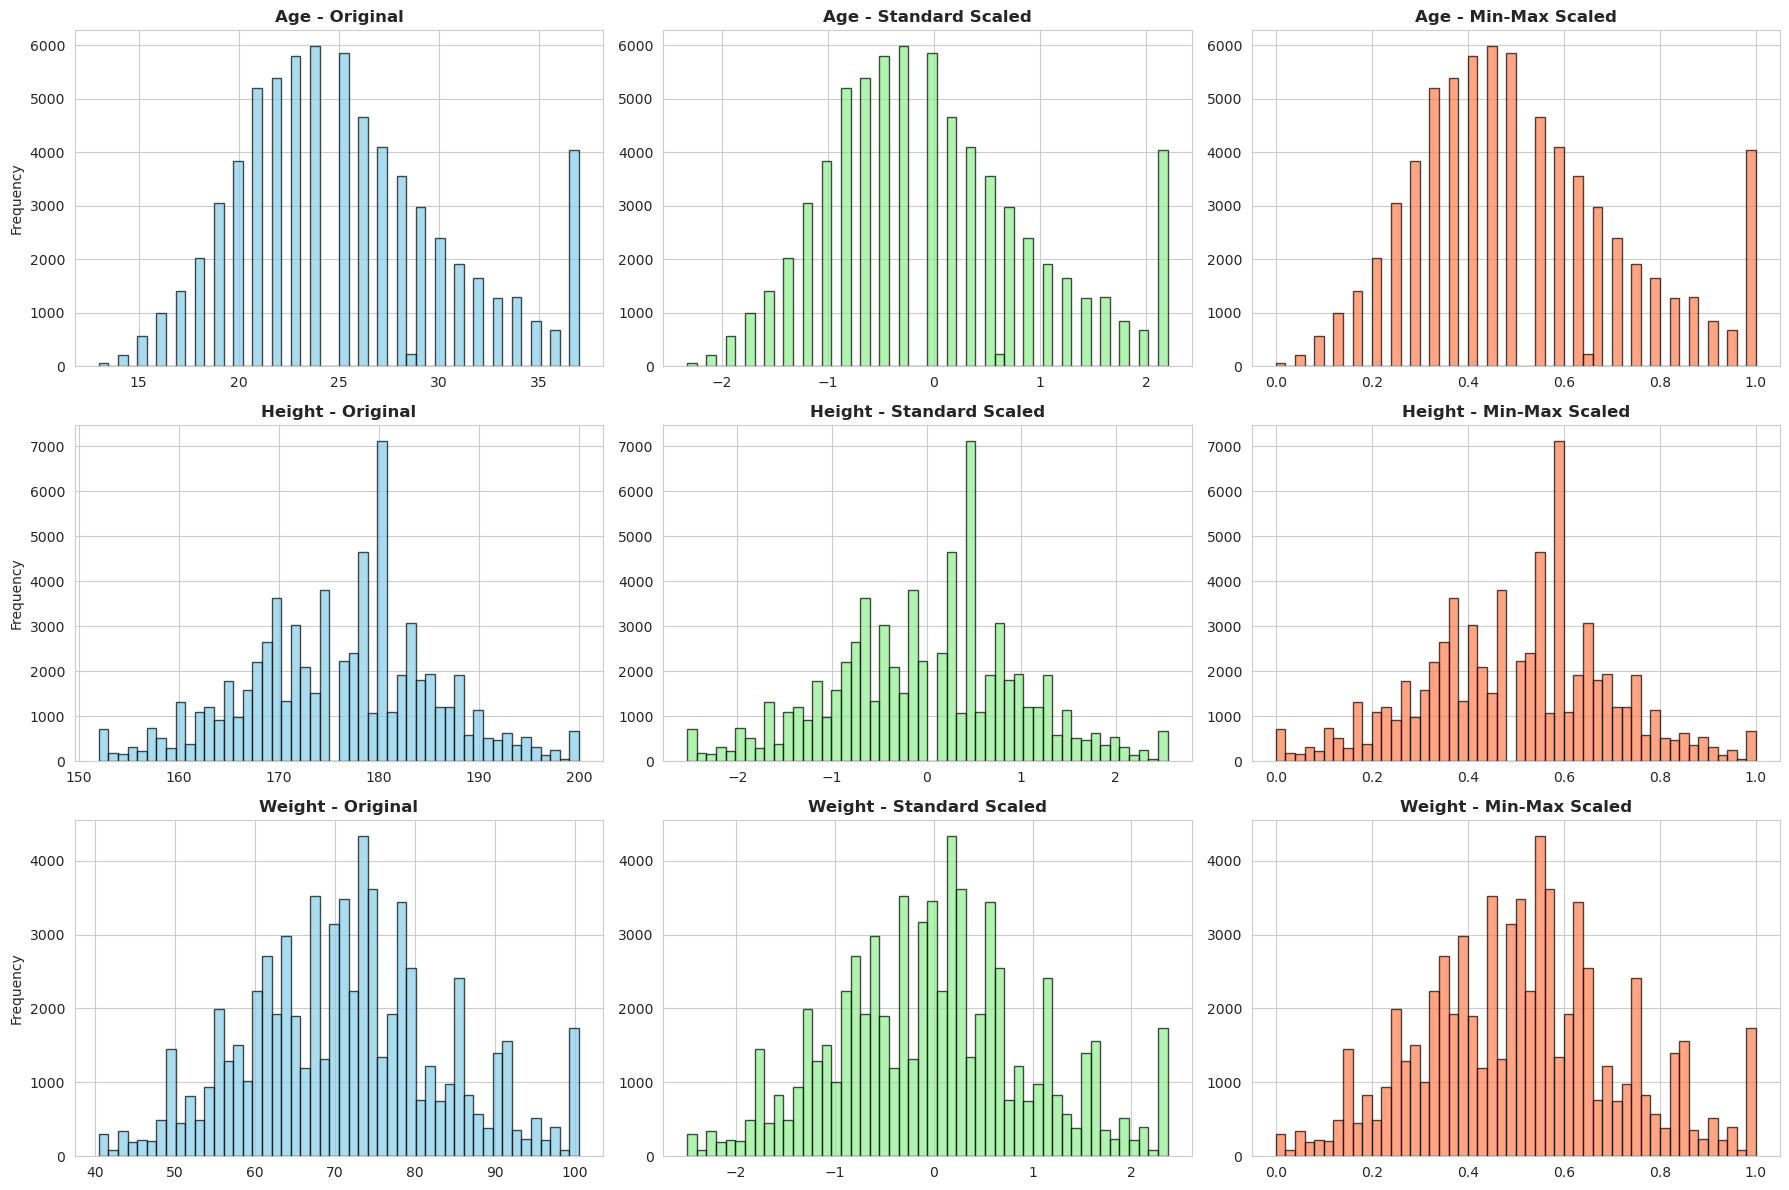

In [35]:
# Visualize scaling effects
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

for idx, col in enumerate(scaled_cols_standard):
    # Original distribution
    ax1 = axes[idx, 0]
    df_scaled[col].hist(bins=50, ax=ax1, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.set_title(f'{col} - Original', fontweight='bold')
    ax1.set_ylabel('Frequency')
    
    # Standard scaled
    ax2 = axes[idx, 1]
    df_scaled[f'{col}_scaled'].hist(bins=50, ax=ax2, color='lightgreen', edgecolor='black', alpha=0.7)
    ax2.set_title(f'{col} - Standard Scaled', fontweight='bold')
    
    # Min-Max scaled
    ax3 = axes[idx, 2]
    df_scaled[f'{col}_normalized'].hist(bins=50, ax=ax3, color='coral', edgecolor='black', alpha=0.7)
    ax3.set_title(f'{col} - Min-Max Scaled', fontweight='bold')

plt.tight_layout()
plt.show()

In [36]:
# Compare before and after
comparison_df = pd.DataFrame({
    'Metric': ['Total Rows', 'Total Columns', 'Missing Values', 'Outliers (Age)', 'Outliers (Height)', 'Outliers (Weight)'],
    'Original': [
        df.shape[0],
        df.shape[1],
        df.isnull().sum().sum(),
        ((df['Age'] < df['Age'].quantile(0.25) - 1.5*(df['Age'].quantile(0.75)-df['Age'].quantile(0.25))) | 
         (df['Age'] > df['Age'].quantile(0.75) + 1.5*(df['Age'].quantile(0.75)-df['Age'].quantile(0.25)))).sum(),
        ((df['Height'] < df['Height'].quantile(0.25) - 1.5*(df['Height'].quantile(0.75)-df['Height'].quantile(0.25))) | 
         (df['Height'] > df['Height'].quantile(0.75) + 1.5*(df['Height'].quantile(0.75)-df['Height'].quantile(0.25)))).sum(),
        ((df['Weight'] < df['Weight'].quantile(0.25) - 1.5*(df['Weight'].quantile(0.75)-df['Weight'].quantile(0.25))) | 
         (df['Weight'] > df['Weight'].quantile(0.75) + 1.5*(df['Weight'].quantile(0.75)-df['Weight'].quantile(0.25)))).sum()
    ],
    'Processed': [
        df_scaled.shape[0],
        df_scaled.shape[1],
        df_scaled[['Age', 'Height', 'Weight']].isnull().sum().sum(),
        0,  # Outliers handled
        0,
        0
    ]
})

print("\n")
print(comparison_df.to_string(index=False))



           Metric  Original  Processed
       Total Rows     70000      70000
    Total Columns        15         22
   Missing Values     96397          0
   Outliers (Age)      2939          0
Outliers (Height)       325          0
Outliers (Weight)       867          0


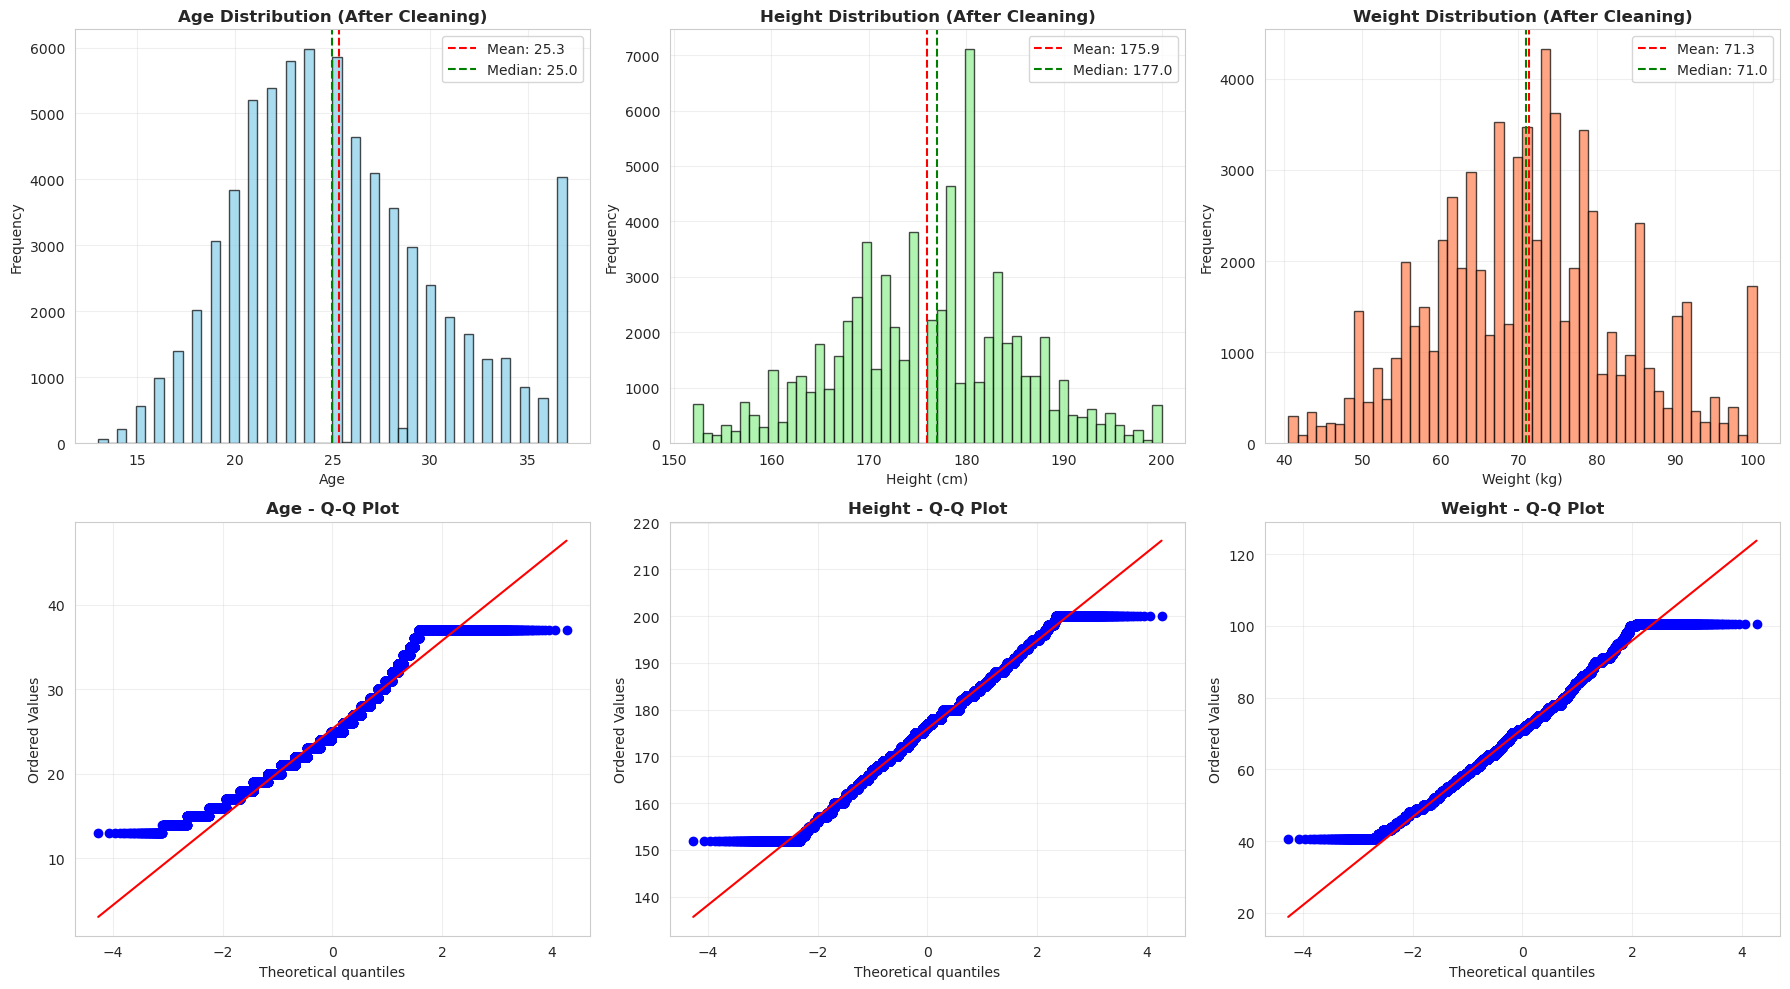

In [38]:
# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age
axes[0, 0].hist(df_scaled['Age'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_scaled['Age'].mean(), color='red', linestyle='--', label=f"Mean: {df_scaled['Age'].mean():.1f}")
axes[0, 0].axvline(df_scaled['Age'].median(), color='green', linestyle='--', label=f"Median: {df_scaled['Age'].median():.1f}")
axes[0, 0].set_title('Age Distribution (After Cleaning)', fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Height
axes[0, 1].hist(df_scaled['Height'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df_scaled['Height'].mean(), color='red', linestyle='--', label=f"Mean: {df_scaled['Height'].mean():.1f}")
axes[0, 1].axvline(df_scaled['Height'].median(), color='green', linestyle='--', label=f"Median: {df_scaled['Height'].median():.1f}")
axes[0, 1].set_title('Height Distribution (After Cleaning)', fontweight='bold')
axes[0, 1].set_xlabel('Height (cm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Weight
axes[0, 2].hist(df_scaled['Weight'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 2].axvline(df_scaled['Weight'].mean(), color='red', linestyle='--', label=f"Mean: {df_scaled['Weight'].mean():.1f}")
axes[0, 2].axvline(df_scaled['Weight'].median(), color='green', linestyle='--', label=f"Median: {df_scaled['Weight'].median():.1f}")
axes[0, 2].set_title('Weight Distribution (After Cleaning)', fontweight='bold')
axes[0, 2].set_xlabel('Weight (kg)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Q-Q plots for normality check
for idx, col in enumerate(['Age', 'Height', 'Weight']):
    ax = axes[1, idx]
    stats.probplot(df_scaled[col], dist="norm", plot=ax)
    ax.set_title(f'{col} - Q-Q Plot', fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [39]:
corr_matrix = df_scaled[['Age', 'Height', 'Weight', 'Year']].corr()
print(corr_matrix.round(3))

          Age  Height  Weight   Year
Age     1.000   0.148   0.257 -0.090
Height  0.148   1.000   0.806 -0.045
Weight  0.257   0.806   1.000 -0.084
Year   -0.090  -0.045  -0.084  1.000


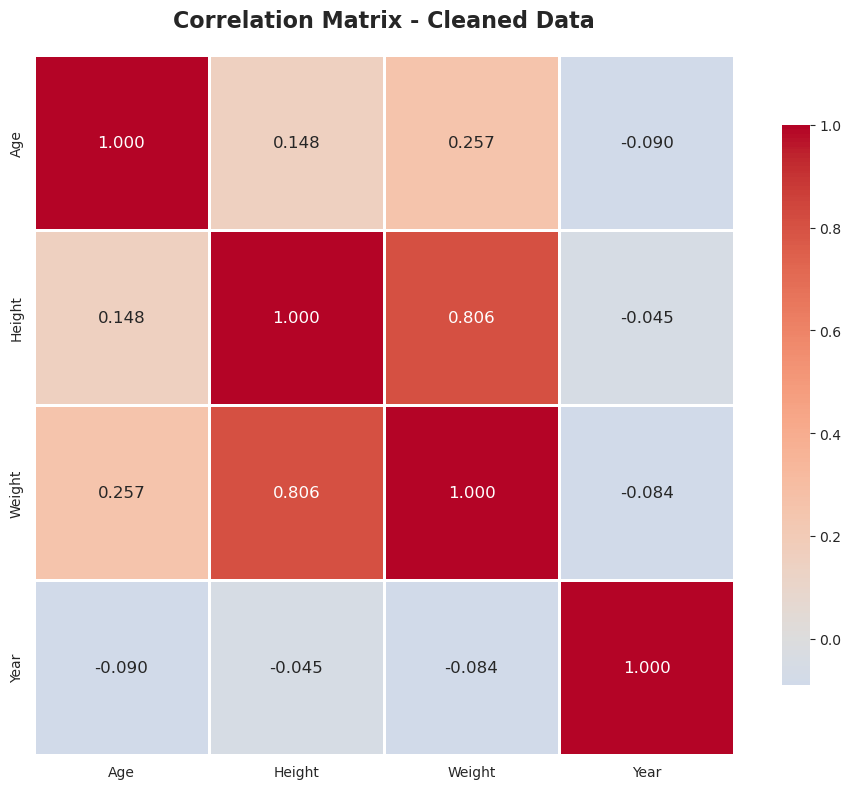

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f', annot_kws={'size': 12})
plt.title('Correlation Matrix - Cleaned Data', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [45]:
numerical_cols = ['Age', 'Height', 'Weight', 'Year']

stats_df = df_scaled[numerical_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T
stats_df['skewness'] = df_scaled[numerical_cols].skew()
stats_df['kurtosis'] = df_scaled[numerical_cols].kurtosis()
stats_df['cv'] = (stats_df['std'] / stats_df['mean'] * 100).round(2)  # Coefficient of variation

print(stats_df.round(2))

          count     mean    std     min      1%      5%     25%     50%  \
Age     70000.0    25.32   5.30    13.0    15.0    18.0    22.0    25.0   
Height  70000.0   175.91   9.45   152.0   152.0   160.0   170.0   177.0   
Weight  70000.0    71.30  12.35    40.5    44.0    51.0    63.0    71.0   
Year    70000.0  1977.77  30.10  1896.0  1904.0  1920.0  1960.0  1984.0   

           75%     95%     99%     max  skewness  kurtosis     cv  
Age       28.0    37.0    37.0    37.0      0.51     -0.25  20.95  
Height   182.0   191.0   199.0   200.0     -0.07     -0.09   5.37  
Weight    78.0    93.0   100.5   100.5      0.15     -0.21  17.31  
Year    2002.0  2016.0  2016.0  2016.0     -0.79     -0.26   1.52  


In [44]:
df_scaled.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,Won_Medal,Age_scaled,Height_scaled,Weight_scaled,Age_normalized,Height_normalized,Weight_normalized
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,NaN,0,-0.249379,0.432095,0.704327,0.458333,0.583333,0.658333
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,Judo,Judo Men's Extra-Lightweight,NaN,0,-0.437886,-0.625591,-0.915696,0.416667,0.375000,0.325000
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,...,Football,Football Men's Football,NaN,0,-0.249379,0.220558,0.137319,0.458333,0.541667,0.541667
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,1.635693,0.643632,1.919343,0.875000,0.625000,0.908333
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Speed Skating,Speed Skating Women's 500 metres,NaN,0,-0.814900,0.960938,0.866329,0.333333,0.687500,0.691667


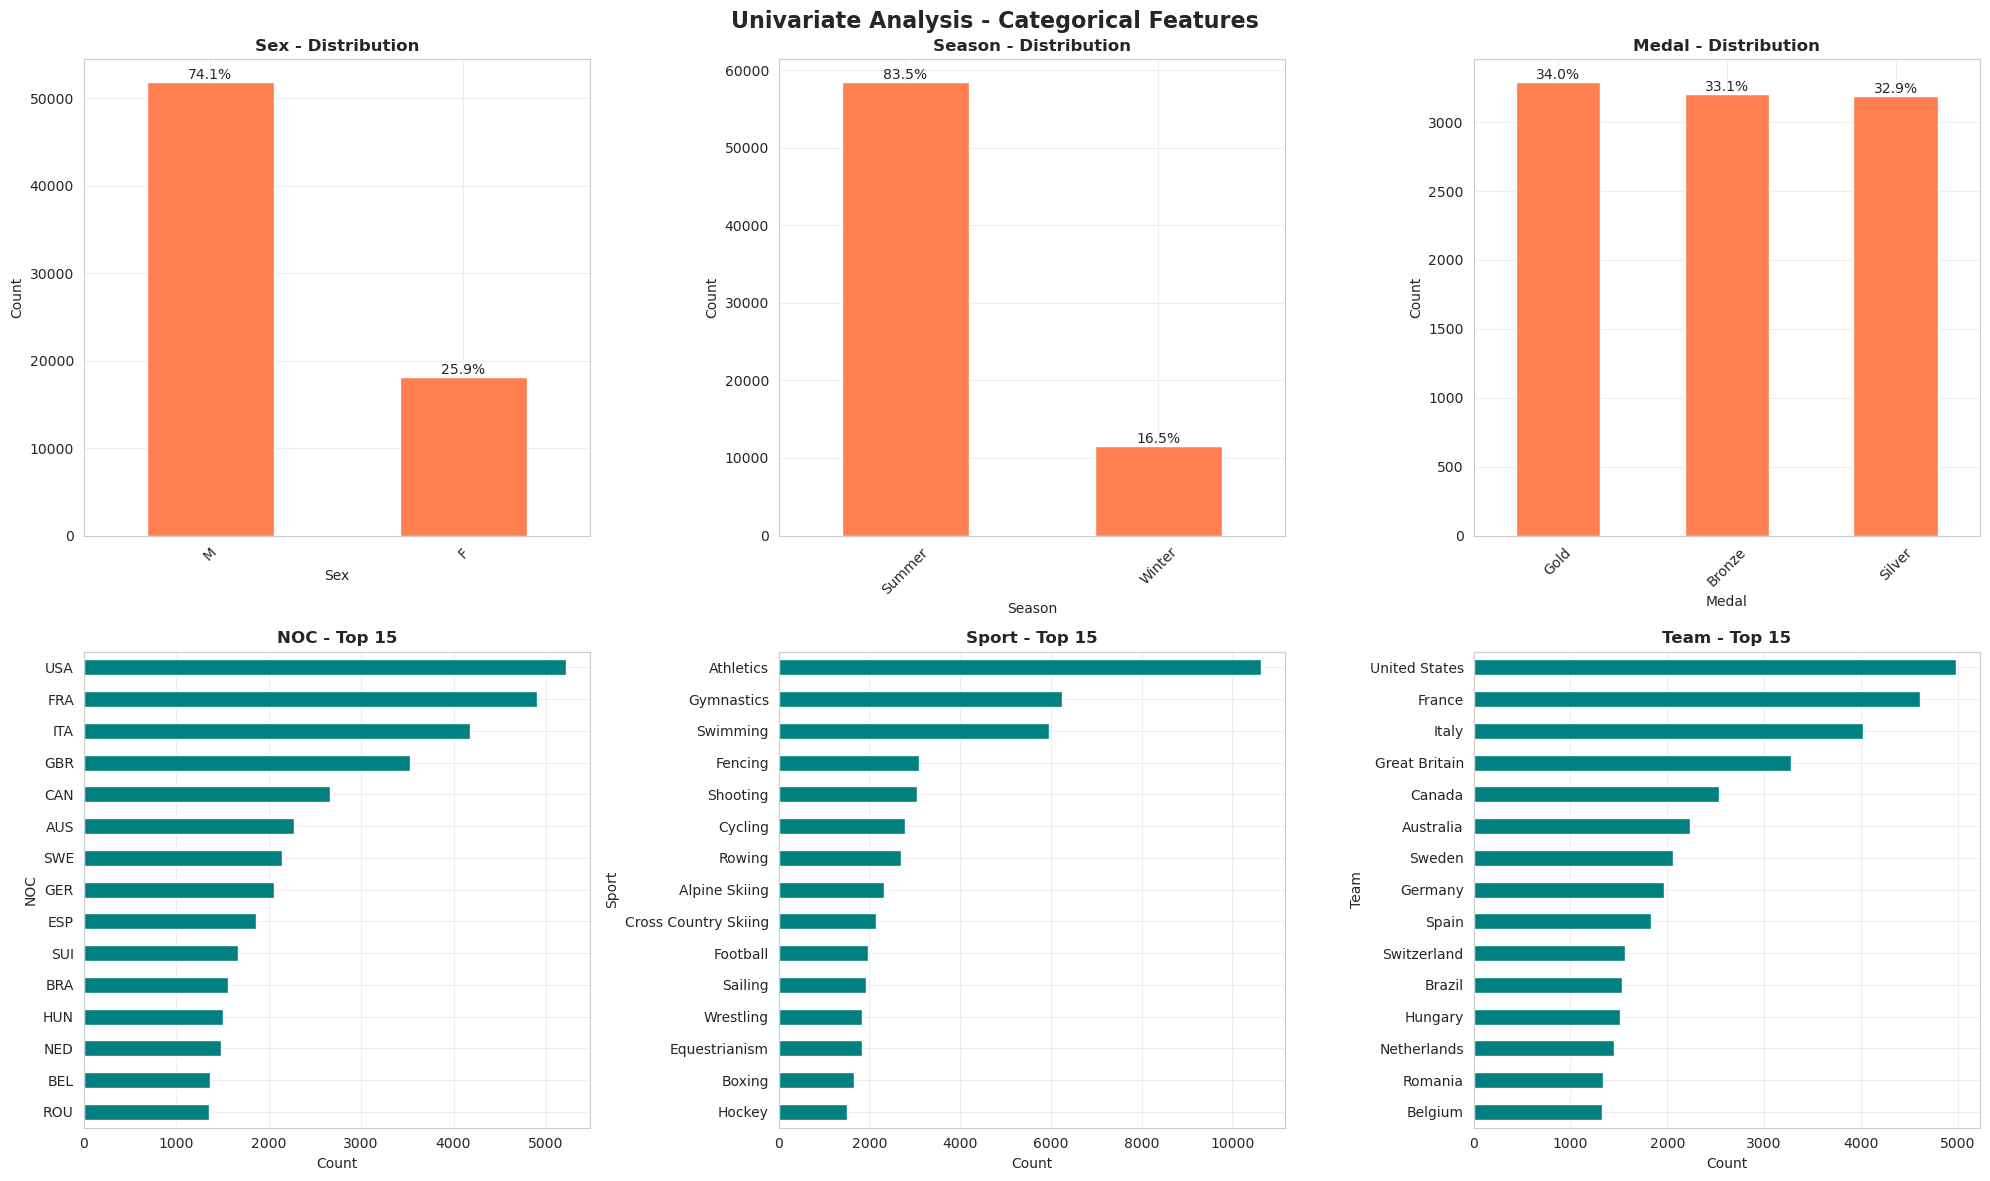

In [49]:
categorical_cols = ['Sex', 'Season', 'Sport', 'Medal', 'NOC', 'Team']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Univariate Analysis - Categorical Features', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, col in enumerate(['Sex', 'Season', 'Medal', 'NOC', 'Sport', 'Team']):
    ax = axes[idx]
    
    if col in ['NOC', 'Sport', 'Team']:
        # Show top 15 for high cardinality variables
        top_values = df[col].value_counts().head(15)
        top_values.plot(kind='barh', ax=ax, color='teal')
        ax.set_title(f'{col} - Top 15', fontweight='bold')
        ax.set_xlabel('Count')
        ax.invert_yaxis()
    else:
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', ax=ax, color='coral')
        ax.set_title(f'{col} - Distribution', fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
        
        # Add percentage labels
        total = value_counts.sum()
        for i, v in enumerate(value_counts):
            ax.text(i, v, f'{v/total*100:.1f}%', ha='center', va='bottom')
    
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [50]:
for col in ['Sex', 'Season', 'Medal']:
    print(f"\n{col}:")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    print(summary)


Sex:
     Count  Percentage
Sex                   
M    51877       74.11
F    18123       25.89

Season:
        Count  Percentage
Season                   
Summer  58467       83.52
Winter  11533       16.48

Medal:
        Count  Percentage
Medal                    
Gold     3292       33.97
Bronze   3208       33.11
Silver   3190       32.92


In [55]:
# Get highly correlated pairs
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Variable 1': corr_matrix.columns[i],
            'Variable 2': corr_matrix.columns[j],
            'Correlation': corr_matrix.iloc[i, j],
            'Strength': 'Strong' if abs(corr_matrix.iloc[i, j]) > 0.7 else 'Moderate' if abs(corr_matrix.iloc[i, j]) > 0.4 else 'Weak'
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False, key=abs)
print(corr_df.to_string(index=False))

Variable 1 Variable 2  Correlation Strength
    Height     Weight     0.806109   Strong
       Age     Weight     0.256975     Weak
       Age     Height     0.148217     Weak
       Age       Year    -0.090428     Weak
    Weight       Year    -0.084121     Weak
    Height       Year    -0.044556     Weak


                        Age  Height  Weight
Sport                                      
Rowing                25.26  185.19   81.75
Fencing               28.22  178.53   72.98
Swimming              20.53  178.52   70.44
Football              23.39  176.71   71.91
Cycling               24.52  176.63   70.40
Athletics             25.01  176.46   68.53
Cross Country Skiing  26.05  174.00   66.93
Shooting              31.91  173.94   75.72
Alpine Skiing         23.09  173.63   72.23
Gymnastics            22.62  164.69   58.86


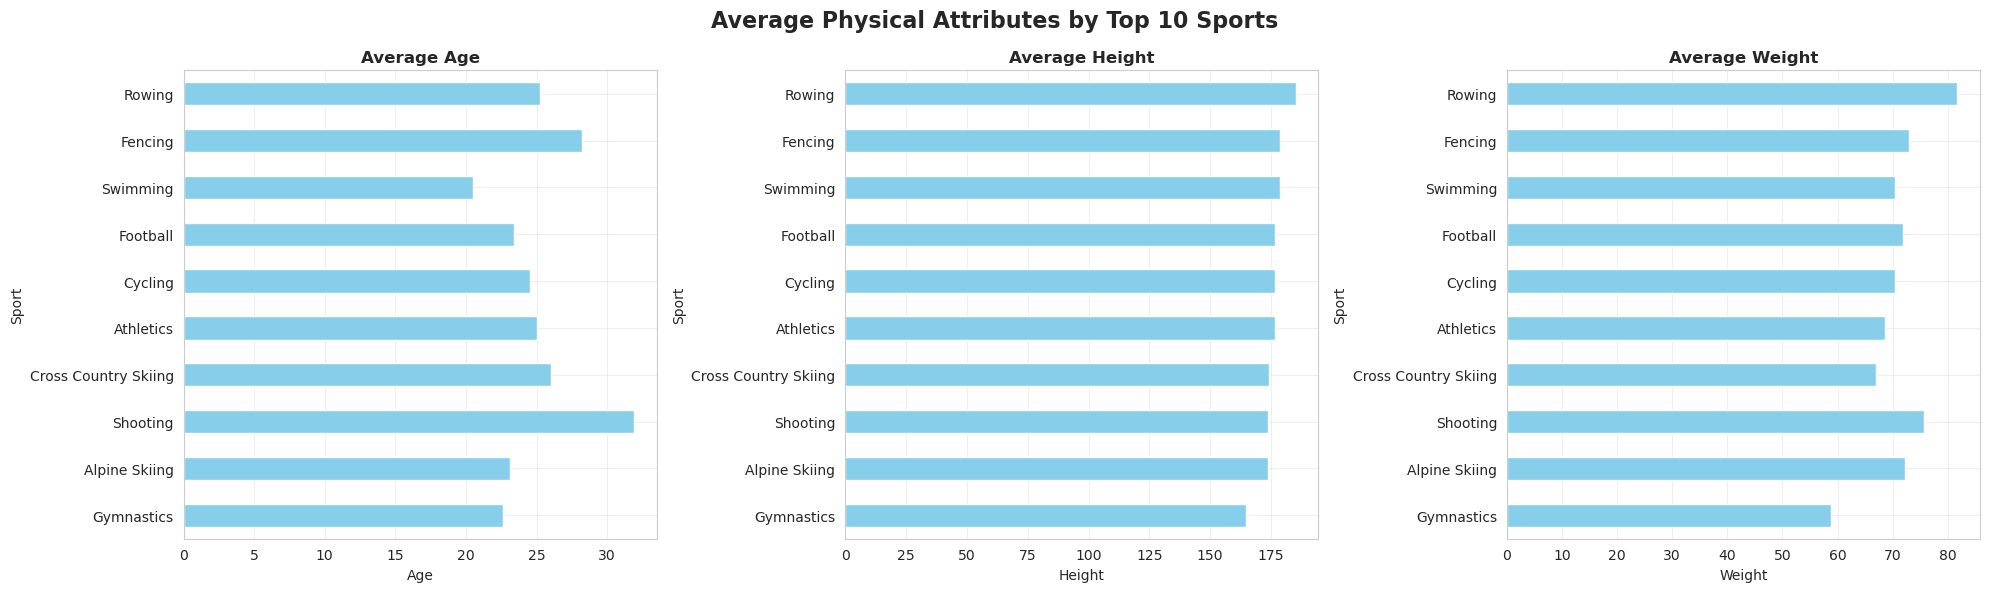

In [58]:
top_sports = df['Sport'].value_counts().head(10).index
sport_stats = df[df['Sport'].isin(top_sports)].groupby('Sport')[['Age', 'Height', 'Weight']].mean().round(2)
sport_stats = sport_stats.sort_values('Height', ascending=False)
print(sport_stats)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Average Physical Attributes by Top 10 Sports', fontsize=16, fontweight='bold')

for idx, col in enumerate(['Age', 'Height', 'Weight']):
    ax = axes[idx]
    sport_stats[col].plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title(f'Average {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Sport')
    ax.invert_yaxis()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [59]:
crosstab_sex_medal = pd.crosstab(df['Sex'], df['Medal'], margins=True, normalize='index') * 100
print("\nPercentage distribution:")
print(crosstab_sex_medal.round(2))


Percentage distribution:
Medal  Bronze   Gold  Silver
Sex                         
F       32.24  34.86   32.90
M       33.42  33.65   32.93
All     33.11  33.97   32.92


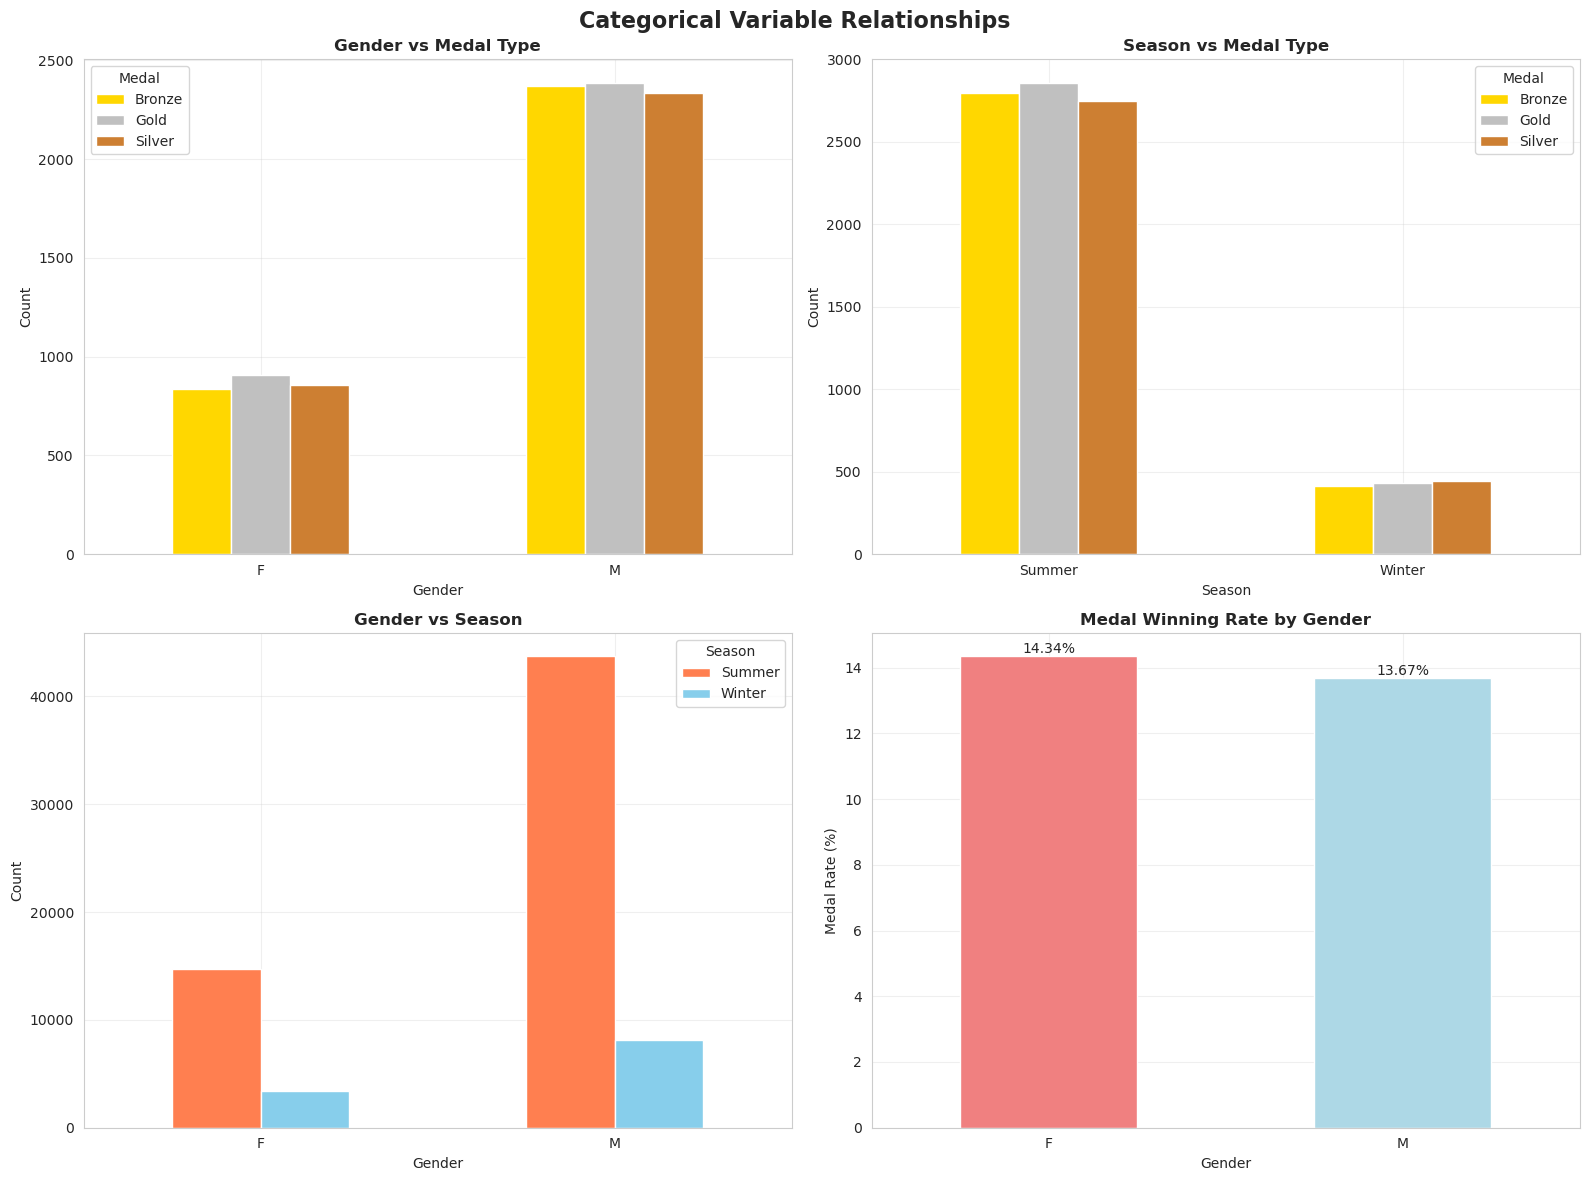

In [60]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Categorical Variable Relationships', fontsize=16, fontweight='bold')

# Sex vs Medal
ax1 = axes[0, 0]
pd.crosstab(df['Sex'], df['Medal']).plot(kind='bar', ax=ax1, color=['gold', 'silver', '#CD7F32'])
ax1.set_title('Gender vs Medal Type', fontweight='bold')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')
ax1.legend(title='Medal')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(alpha=0.3)

# Season vs Medal
ax2 = axes[0, 1]
pd.crosstab(df['Season'], df['Medal']).plot(kind='bar', ax=ax2, color=['gold', 'silver', '#CD7F32'])
ax2.set_title('Season vs Medal Type', fontweight='bold')
ax2.set_xlabel('Season')
ax2.set_ylabel('Count')
ax2.legend(title='Medal')
ax2.tick_params(axis='x', rotation=0)
ax2.grid(alpha=0.3)

# Sex vs Season
ax3 = axes[1, 0]
pd.crosstab(df['Sex'], df['Season']).plot(kind='bar', ax=ax3, color=['coral', 'skyblue'])
ax3.set_title('Gender vs Season', fontweight='bold')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Count')
ax3.legend(title='Season')
ax3.tick_params(axis='x', rotation=0)
ax3.grid(alpha=0.3)

# Medal rate by gender
ax4 = axes[1, 1]
medal_rate = df.groupby('Sex')['Won_Medal'].mean() * 100
medal_rate.plot(kind='bar', ax=ax4, color=['lightcoral', 'lightblue'])
ax4.set_title('Medal Winning Rate by Gender', fontweight='bold')
ax4.set_xlabel('Gender')
ax4.set_ylabel('Medal Rate (%)')
ax4.tick_params(axis='x', rotation=0)
ax4.grid(alpha=0.3)

# Add value labels
for i, v in enumerate(medal_rate):
    ax4.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


📈 TEMPORAL TRENDS
----------------------------------------------------------------------------------------------------
      Athletes        Age      Height     Weight  Won_Medal
Year                                                       
1896        65  24.900000  178.661538  74.600000         25
1900       631  27.556260  179.017433  75.052298        188
1904       308  26.061688  176.701299  72.017857        124
1906       431  25.859629  178.617169  74.592807        112
1908       865  26.130636  177.037572  72.813295        223
1912      1025  27.162927  177.779512  74.257561        239
1920      1218  28.005337  177.123974  73.444992        371
1924      1579  27.510450  177.489550  74.122863        266
1928      1434  27.028940  177.926778  74.420153        221
1932       914  28.404814  177.829322  78.118709        199


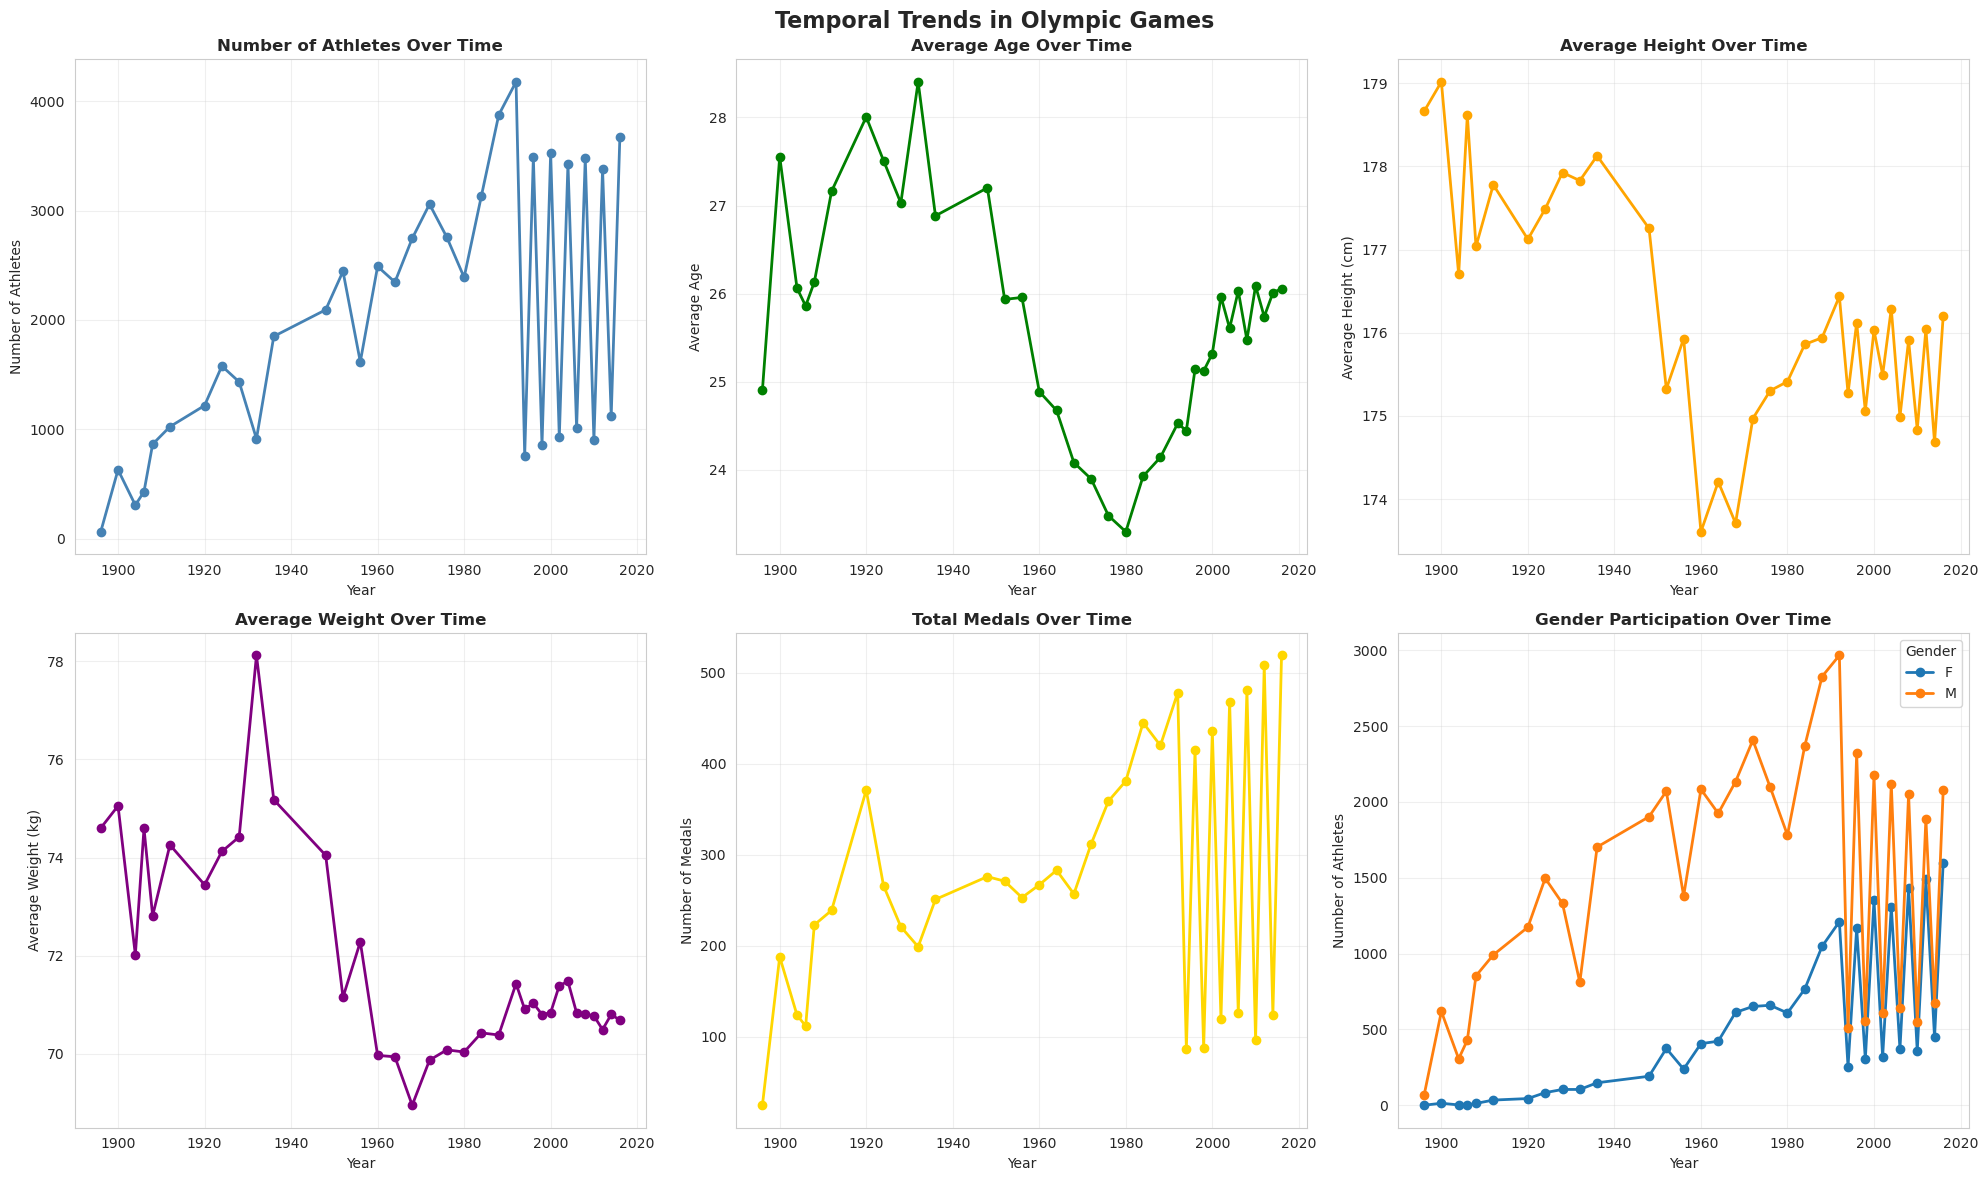

In [61]:
# Athletes over time
yearly_stats = df.groupby('Year').agg({
    'ID': 'count',
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'Won_Medal': 'sum'
}).rename(columns={'ID': 'Athletes'})

print("\n📈 TEMPORAL TRENDS")
print("-" * 100)
print(yearly_stats.head(10))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Temporal Trends in Olympic Games', fontsize=16, fontweight='bold')

# Athletes over time
ax1 = axes[0, 0]
ax1.plot(yearly_stats.index, yearly_stats['Athletes'], marker='o', linewidth=2, color='steelblue')
ax1.set_title('Number of Athletes Over Time', fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Athletes')
ax1.grid(alpha=0.3)

# Average age over time
ax2 = axes[0, 1]
ax2.plot(yearly_stats.index, yearly_stats['Age'], marker='o', linewidth=2, color='green')
ax2.set_title('Average Age Over Time', fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Age')
ax2.grid(alpha=0.3)

# Average height over time
ax3 = axes[0, 2]
ax3.plot(yearly_stats.index, yearly_stats['Height'], marker='o', linewidth=2, color='orange')
ax3.set_title('Average Height Over Time', fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Height (cm)')
ax3.grid(alpha=0.3)

# Average weight over time
ax4 = axes[1, 0]
ax4.plot(yearly_stats.index, yearly_stats['Weight'], marker='o', linewidth=2, color='purple')
ax4.set_title('Average Weight Over Time', fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Average Weight (kg)')
ax4.grid(alpha=0.3)

# Medals over time
ax5 = axes[1, 1]
ax5.plot(yearly_stats.index, yearly_stats['Won_Medal'], marker='o', linewidth=2, color='gold')
ax5.set_title('Total Medals Over Time', fontweight='bold')
ax5.set_xlabel('Year')
ax5.set_ylabel('Number of Medals')
ax5.grid(alpha=0.3)

# Gender participation over time
ax6 = axes[1, 2]
gender_time = df.groupby(['Year', 'Sex']).size().unstack(fill_value=0)
gender_time.plot(ax=ax6, linewidth=2, marker='o')
ax6.set_title('Gender Participation Over Time', fontweight='bold')
ax6.set_xlabel('Year')
ax6.set_ylabel('Number of Athletes')
ax6.legend(title='Gender')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [62]:
top_countries = df[df['Won_Medal'] == 1].groupby('NOC').size().sort_values(ascending=False).head(10)
print(top_countries)

NOC
USA    1561
FRA     660
GBR     604
ITA     604
URS     515
GER     434
AUS     373
SWE     365
CAN     360
NED     272
dtype: int64


In [63]:
medal_rate_sport = df.groupby('Sport')['Won_Medal'].agg(['sum', 'count'])
medal_rate_sport['rate'] = (medal_rate_sport['sum'] / medal_rate_sport['count'] * 100).round(2)
medal_rate_sport = medal_rate_sport.sort_values('rate', ascending=False).head(15)
print(medal_rate_sport)

                     sum  count    rate
Sport                                  
Alpinism               7      7  100.00
Rugby                 50     50  100.00
Basque Pelota          1      1  100.00
Cricket               13     13  100.00
Lacrosse              20     20  100.00
Racquets               5      6   83.33
Polo                  22     37   59.46
Tug-Of-War            21     37   56.76
Roque                  1      2   50.00
Military Ski Patrol    4      9   44.44
Motorboating           2      5   40.00
Softball              40    112   35.71
Curling               26     78   33.33
Hockey               447   1507   29.66
Rowing               781   2690   29.03


In [64]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 25, 30, 35, 100], 
                         labels=['<20', '20-25', '25-30', '30-35', '>35'])
age_group_stats = df.groupby('Age_Group').agg({
    'ID': 'count',
    'Won_Medal': ['sum', 'mean']
}).round(3)
age_group_stats.columns = ['Count', 'Total_Medals', 'Medal_Rate']
print(age_group_stats)

           Count  Total_Medals  Medal_Rate
Age_Group                                 
<20        12146          1250       0.103
20-25      28209          3893       0.138
25-30      17933          2862       0.160
30-35       6984          1068       0.153
>35         4728           617       0.130


In [65]:
country_stats = df.groupby('NOC').agg({
    'ID': 'count',
    'Won_Medal': 'sum',
    'Year': lambda x: x.nunique()
}).rename(columns={'ID': 'Athletes', 'Won_Medal': 'Medals', 'Year': 'Games_Participated'})
country_stats['Medal_Rate'] = (country_stats['Medals'] / country_stats['Athletes'] * 100).round(2)
country_stats = country_stats.sort_values('Medals', ascending=False)

print("\nTop 15 Countries by Total Medals:")
print(country_stats.head(15))

print("\nTop 15 Countries by Medal Rate (min 100 athletes):")
high_participation = country_stats[country_stats['Athletes'] >= 100].sort_values('Medal_Rate', ascending=False)
print(high_participation.head(15))


Top 15 Countries by Total Medals:
     Athletes  Medals  Games_Participated  Medal_Rate
NOC                                                  
USA      5216    1561                  35       29.93
FRA      4902     660                  35       13.46
ITA      4176     604                  34       14.46
GBR      3526     604                  35       17.13
URS      1201     515                  10       42.88
GER      2060     434                  26       21.07
AUS      2270     373                  30       16.43
SWE      2140     365                  33       17.06
CAN      2662     360                  33       13.52
NED      1480     272                  33       18.38
NOR      1202     266                  34       22.13
HUN      1512     241                  34       15.94
RUS      1070     227                  15       21.21
GDR       545     203                   6       37.25
ROU      1360     198                  28       14.56

Top 15 Countries by Medal Rate (min 100 athlet

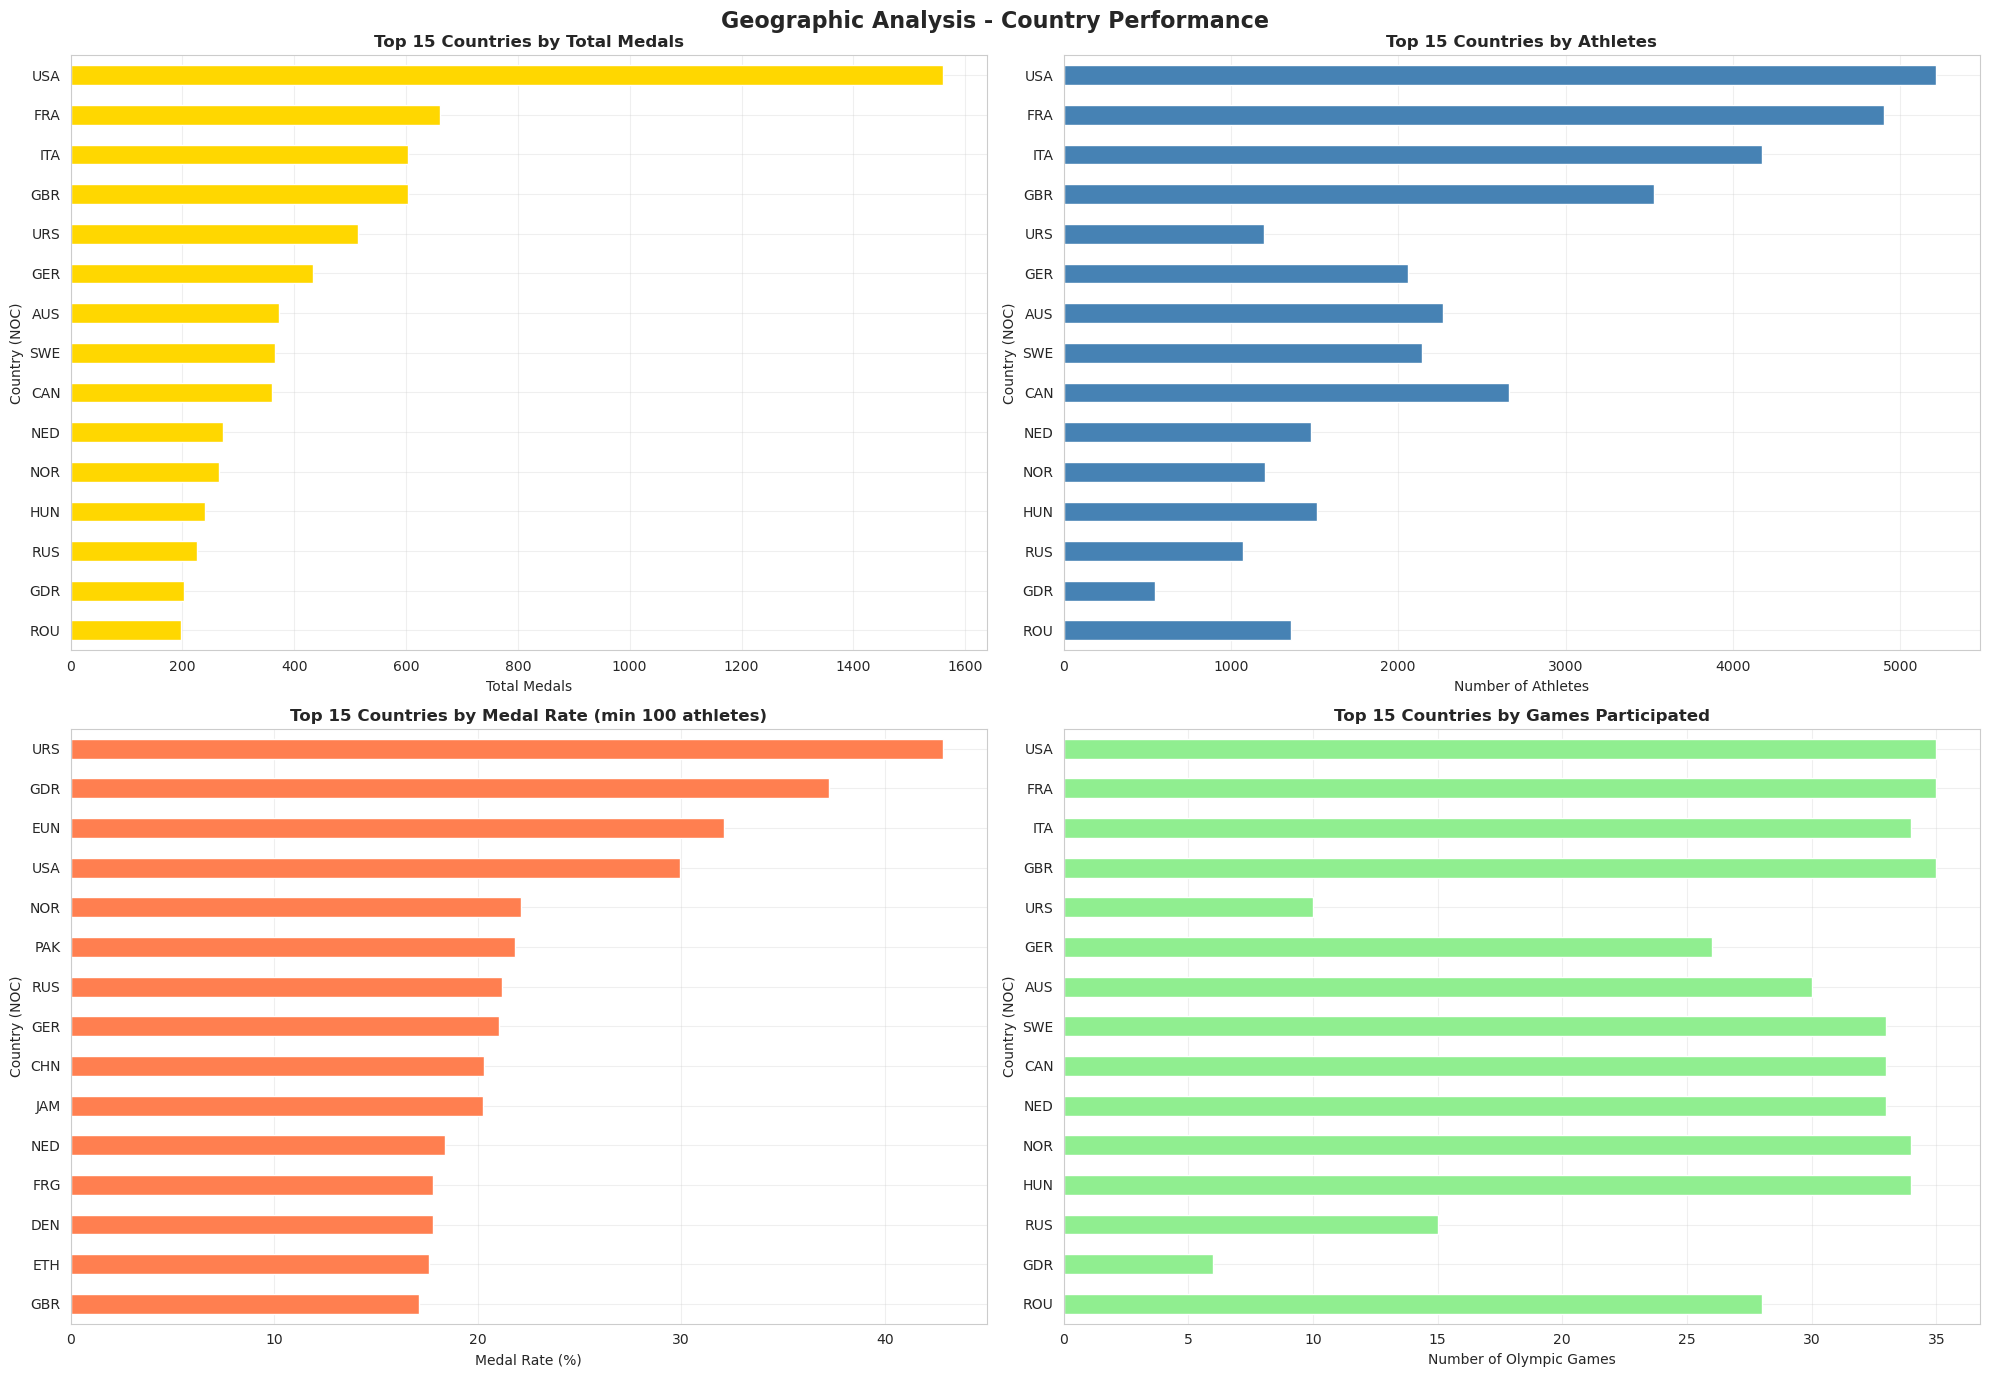

In [66]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Geographic Analysis - Country Performance', fontsize=16, fontweight='bold')

# Top countries by medals
ax1 = axes[0, 0]
country_stats.head(15)['Medals'].plot(kind='barh', ax=ax1, color='gold')
ax1.set_title('Top 15 Countries by Total Medals', fontweight='bold')
ax1.set_xlabel('Total Medals')
ax1.set_ylabel('Country (NOC)')
ax1.invert_yaxis()
ax1.grid(alpha=0.3)

# Top countries by athletes
ax2 = axes[0, 1]
country_stats.head(15)['Athletes'].plot(kind='barh', ax=ax2, color='steelblue')
ax2.set_title('Top 15 Countries by Athletes', fontweight='bold')
ax2.set_xlabel('Number of Athletes')
ax2.set_ylabel('Country (NOC)')
ax2.invert_yaxis()
ax2.grid(alpha=0.3)

# Medal rate (high participation countries)
ax3 = axes[1, 0]
high_participation.head(15)['Medal_Rate'].plot(kind='barh', ax=ax3, color='coral')
ax3.set_title('Top 15 Countries by Medal Rate (min 100 athletes)', fontweight='bold')
ax3.set_xlabel('Medal Rate (%)')
ax3.set_ylabel('Country (NOC)')
ax3.invert_yaxis()
ax3.grid(alpha=0.3)

# Games participation
ax4 = axes[1, 1]
country_stats.head(15)['Games_Participated'].plot(kind='barh', ax=ax4, color='lightgreen')
ax4.set_title('Top 15 Countries by Games Participated', fontweight='bold')
ax4.set_xlabel('Number of Olympic Games')
ax4.set_ylabel('Country (NOC)')
ax4.invert_yaxis()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Sports by Height Category:

Short (8 sports):
                       Height  Weight  Participants
Sport                                              
Gymnastics             164.69   58.86          6248
Trampolining           165.71   59.51            35
Rhythmic Gymnastics    166.86   48.03           156
Diving                 166.88   61.66           759
Synchronized Swimming  167.74   55.74           257

Medium (47 sports):
                           Height  Weight  Participants
Sport                                                  
Short Track Speed Skating  170.44   65.21           356
Table Tennis               171.75   65.66           396
Freestyle Skiing           172.32   68.38           240
Snowboarding               172.39   70.21           218
Boxing                     172.49   64.71          1660

Tall (9 sports):
                  Height  Weight  Participants
Sport                                         
Bobsleigh         181.73   88.66           793
Tug-Of-War       

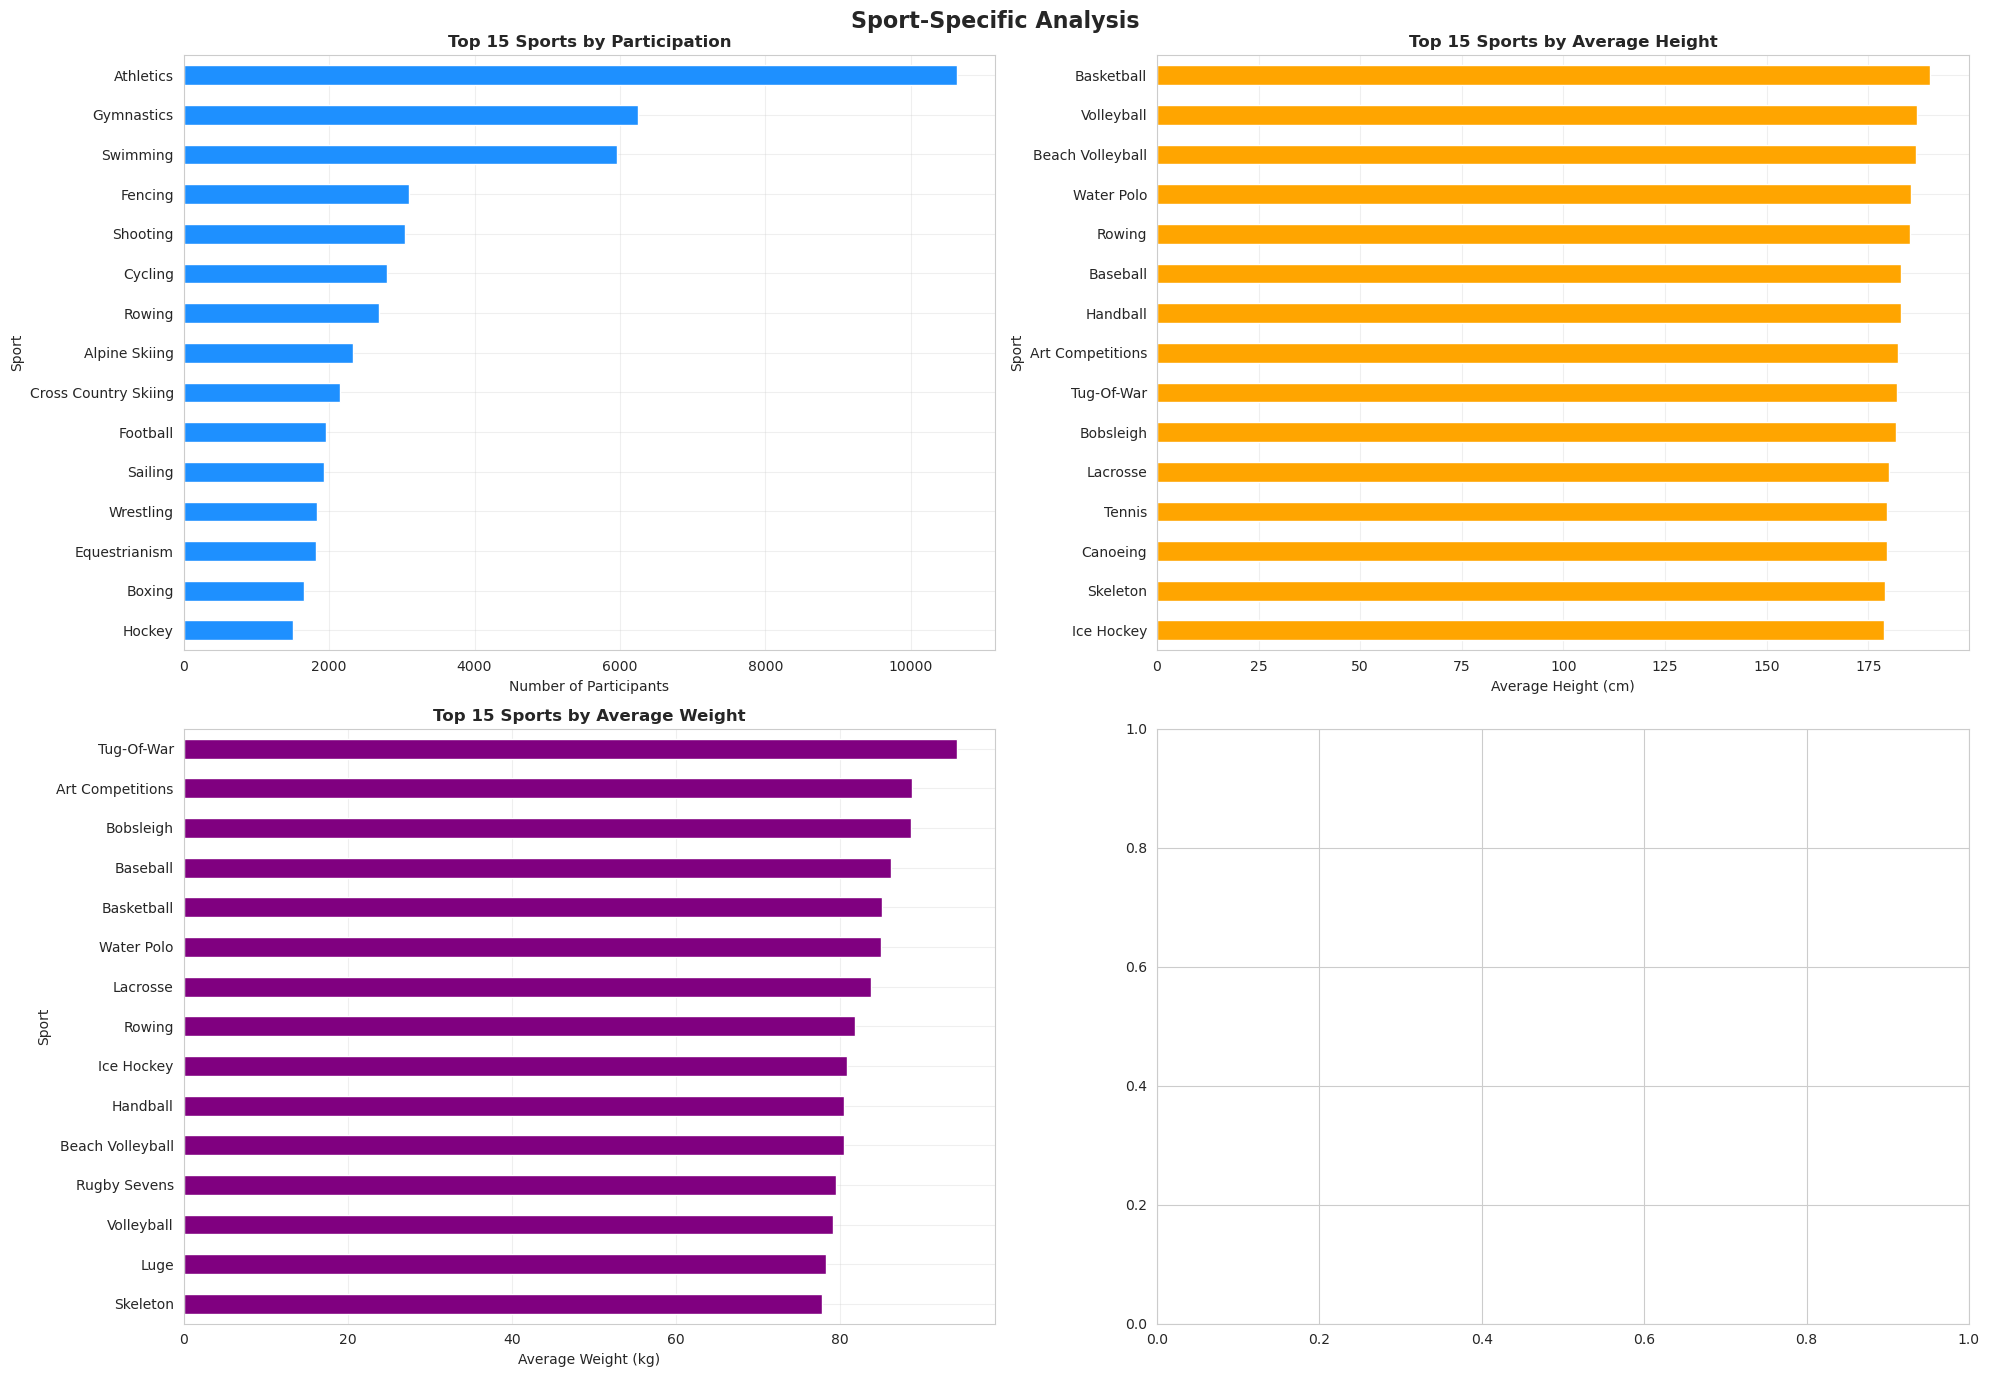

In [73]:
sport_analysis = df.groupby('Sport').agg({
    'ID': 'count',
    'Won_Medal': 'sum',
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'Sex': lambda x: (x == 'M').sum() / len(x) * 100
}).rename(columns={
    'ID': 'Participants',
    'Won_Medal': 'Medals',
    'Sex': 'Male_Percentage'
})
sport_analysis['Medal_Rate'] = (sport_analysis['Medals'] / sport_analysis['Participants'] * 100).round(2)
sport_analysis = sport_analysis.round(2)

# Categorize sports by height requirement
sport_analysis['Height_Category'] = pd.cut(sport_analysis['Height'], 
                                            bins=[0, 170, 180, 190, 250],
                                            labels=['Short', 'Medium', 'Tall', 'Very Tall'])

print("\nSports by Height Category:")
for cat in ['Short', 'Medium', 'Tall', 'Very Tall']:
    sports = sport_analysis[sport_analysis['Height_Category'] == cat].sort_values('Height')
    print(f"\n{cat} ({len(sports)} sports):")
    print(sports[['Height', 'Weight', 'Participants']].head(5))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Sport-Specific Analysis', fontsize=16, fontweight='bold')

# Top sports by participation
ax1 = axes[0, 0]
top_sports_part = sport_analysis.sort_values('Participants', ascending=False).head(15)
top_sports_part['Participants'].plot(kind='barh', ax=ax1, color='dodgerblue')
ax1.set_title('Top 15 Sports by Participation', fontweight='bold')
ax1.set_xlabel('Number of Participants')
ax1.set_ylabel('Sport')
ax1.invert_yaxis()
ax1.grid(alpha=0.3)

# Average height by sport
ax2 = axes[0, 1]
sport_analysis.sort_values('Height', ascending=False).head(15)['Height'].plot(kind='barh', ax=ax2, color='orange')
ax2.set_title('Top 15 Sports by Average Height', fontweight='bold')
ax2.set_xlabel('Average Height (cm)')
ax2.set_ylabel('Sport')
ax2.invert_yaxis()
ax2.grid(alpha=0.3)

# Average weight by sport
ax3 = axes[1, 0]
sport_analysis.sort_values('Weight', ascending=False).head(15)['Weight'].plot(kind='barh', ax=ax3, color='purple')
ax3.set_title('Top 15 Sports by Average Weight', fontweight='bold')
ax3.set_xlabel('Average Weight (kg)')
ax3.set_ylabel('Sport')
ax3.invert_yaxis()
ax3.grid(alpha=0.3)


plt.tight_layout()
plt.show()